## Importing Necessary Libraries

In [718]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## importing Data

In [719]:
incident_data=pd.read_csv('/content/incident_event_log.csv')
incident_data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,?,?,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,?,False,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


## Data Understanding

In [720]:
incident_data.shape

(141712, 36)

In [721]:
list(incident_data.columns)

['number',
 'incident_state',
 'active',
 'reassignment_count',
 'reopen_count',
 'sys_mod_count',
 'made_sla',
 'caller_id',
 'opened_by',
 'opened_at',
 'sys_created_by',
 'sys_created_at',
 'sys_updated_by',
 'sys_updated_at',
 'contact_type',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'cmdb_ci',
 'impact',
 'urgency',
 'priority',
 'assignment_group',
 'assigned_to',
 'knowledge',
 'u_priority_confirmation',
 'notify',
 'problem_id',
 'rfc',
 'vendor',
 'caused_by',
 'closed_code',
 'resolved_by',
 'resolved_at',
 'closed_at']

In [722]:
incident_data=incident_data.replace('?',np.nan)
incident_data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,NaN,NaN,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,NaN,NaN,NaN,NaN,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,NaN,NaN,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,NaN,NaN,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 31,NaN,False,False,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,NaN,NaN,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,NaN,NaN,NaN,NaN,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [723]:
incident_data['incident_state'].unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [724]:
incident_data['incident_state'].replace('-100',np.nan,inplace=True)

In [725]:
incident_data.isna().sum()

number                          0
incident_state                  5
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [726]:
na_value=incident_data.isna().sum()

In [727]:
na_value/len(incident_data)

number                     0.000000
incident_state             0.000035
active                     0.000000
reassignment_count         0.000000
reopen_count               0.000000
sys_mod_count              0.000000
made_sla                   0.000000
caller_id                  0.000205
opened_by                  0.034118
opened_at                  0.000000
sys_created_by             0.374534
sys_created_at             0.374534
sys_updated_by             0.000000
sys_updated_at             0.000000
contact_type               0.000000
location                   0.000536
category                   0.000550
subcategory                0.000783
u_symptom                  0.232613
cmdb_ci                    0.996860
impact                     0.000000
urgency                    0.000000
priority                   0.000000
assignment_group           0.100295
assigned_to                0.194027
knowledge                  0.000000
u_priority_confirmation    0.000000
notify                     0

In [728]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141707 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

## Data Cleaning

In [729]:
incident_data=incident_data.drop(columns=['sys_created_by','sys_created_at','problem_id','rfc','vendor','caused_by','cmdb_ci'])
incident_data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,NaN,False,False,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [730]:
incident_data=incident_data.dropna(subset=['incident_state','caller_id','opened_by','location','category','subcategory','closed_code','resolved_by','resolved_at'])
incident_data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,NaN,False,False,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [731]:
incident_data.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                      0
opened_at                      0
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                       0
category                       0
subcategory                    0
u_symptom                  30497
impact                         0
urgency                        0
priority                       0
assignment_group           13244
assigned_to                26135
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                    0
resolved_by                    0
resolved_at                    0
closed_at                      0
dtype: int64

In [732]:
na_value_1=incident_data.isna().sum()

In [733]:
na_value_1/len(incident_data)

number                     0.000000
incident_state             0.000000
active                     0.000000
reassignment_count         0.000000
reopen_count               0.000000
sys_mod_count              0.000000
made_sla                   0.000000
caller_id                  0.000000
opened_by                  0.000000
opened_at                  0.000000
sys_updated_by             0.000000
sys_updated_at             0.000000
contact_type               0.000000
location                   0.000000
category                   0.000000
subcategory                0.000000
u_symptom                  0.229239
impact                     0.000000
urgency                    0.000000
priority                   0.000000
assignment_group           0.099552
assigned_to                0.196451
knowledge                  0.000000
u_priority_confirmation    0.000000
notify                     0.000000
closed_code                0.000000
resolved_by                0.000000
resolved_at                0


## Filling the NaN values in Column with Mode value of that column

In [734]:
incident_data['assignment_group'].value_counts()

Group 70    39168
Group 25     7350
Group 24     6524
Group 20     5864
Group 39     4591
            ...  
Group 8         5
Group 41        3
Group 38        2
Group 11        1
Group 16        1
Name: assignment_group, Length: 77, dtype: int64

In [735]:
incident_data['assignment_group']=incident_data['assignment_group'].fillna('Group 70')
incident_data['assignment_group'].value_counts()

Group 70    52412
Group 25     7350
Group 24     6524
Group 20     5864
Group 39     4591
            ...  
Group 8         5
Group 41        3
Group 38        2
Group 11        1
Group 16        1
Name: assignment_group, Length: 77, dtype: int64

In [736]:
incident_data['u_symptom'].value_counts()

Symptom 491    49545
Symptom 534     4955
Symptom 387     2428
Symptom 116     2104
Symptom 4       2082
               ...  
Symptom 590        1
Symptom 599        1
Symptom 21         1
Symptom 137        1
Symptom 441        1
Name: u_symptom, Length: 518, dtype: int64

In [737]:
incident_data['u_symptom']=incident_data['u_symptom'].fillna('Symptom 491')
incident_data['u_symptom'].value_counts()

Symptom 491    80042
Symptom 534     4955
Symptom 387     2428
Symptom 116     2104
Symptom 4       2082
               ...  
Symptom 590        1
Symptom 599        1
Symptom 21         1
Symptom 137        1
Symptom 441        1
Name: u_symptom, Length: 518, dtype: int64

In [738]:
incident_data['assigned_to'].value_counts()

Resolver 17     9817
Resolver 13     7968
Resolver 194    3439
Resolver 57     2989
Resolver 69     2805
                ... 
Resolver 146       1
Resolver 131       1
Resolver 129       1
Resolver 67        1
Resolver 38        1
Name: assigned_to, Length: 233, dtype: int64

In [739]:
incident_data['assigned_to']=incident_data['assigned_to'].fillna('Resolver 17')
incident_data['assigned_to'].value_counts()

Resolver 17     35952
Resolver 13      7968
Resolver 194     3439
Resolver 57      2989
Resolver 69      2805
                ...  
Resolver 146        1
Resolver 131        1
Resolver 129        1
Resolver 67         1
Resolver 38         1
Name: assigned_to, Length: 233, dtype: int64

In [740]:
incident_data.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
closed_code                0
resolved_by                0
resolved_at                0
closed_at                  0
dtype: int64

## EDA

In [741]:
incident_data.groupby(by=['contact_type'])['active'].value_counts().sort_values(ascending = False)

contact_type    active
Phone           True      109413
                False      22434
Self service    True         821
                False        160
Email           True         132
                False         59
Direct opening  True          13
                False          4
Name: active, dtype: int64

In [742]:
incident_data.groupby(by=['location'])['active'].value_counts().sort_values(ascending = False)

location      active
Location 204  True      24459
Location 161  True      17714
Location 143  True      15151
Location 108  True       9982
Location 93   True       9035
                        ...  
Location 13   False         1
Location 193  False         1
Location 194  False         1
Location 121  False         1
Location 123  False         1
Name: active, Length: 436, dtype: int64

In [743]:
incident_data.groupby(by=['location','active'])['impact'].value_counts().sort_values(ascending = False)

location      active  impact    
Location 204  True    2 - Medium    23100
Location 161  True    2 - Medium    16834
Location 143  True    2 - Medium    14265
Location 108  True    2 - Medium     9602
Location 93   True    2 - Medium     8604
                                    ...  
Location 23   False   1 - High          1
Location 149  False   1 - High          1
Location 63   False   2 - Medium        1
Location 61   False   2 - Medium        1
Location 29   False   2 - Medium        1
Name: impact, Length: 690, dtype: int64

In [744]:
incident_data.groupby(by=['assignment_group','active'])['impact'].value_counts().sort_values(ascending = False)

assignment_group  active  impact    
Group 70          True    2 - Medium    41024
                  False   2 - Medium     9485
Group 25          True    2 - Medium     5858
Group 24          True    2 - Medium     5374
Group 20          True    2 - Medium     5284
                                        ...  
Group 64          False   1 - High          1
Group 7           False   2 - Medium        1
Group 71          False   1 - High          1
                          2 - Medium        1
Group 9           True    1 - High          1
Name: impact, Length: 349, dtype: int64

In [745]:
incident_data.groupby(by=['impact'])['category'].value_counts()

impact    category   
1 - High  Category 46    844
          Category 23    355
          Category 42    353
          Category 57    343
          Category 53    217
                        ... 
3 - Low   Category 43     11
          Category 47      7
          Category 38      6
          Category 62      5
          Category 56      3
Name: category, Length: 115, dtype: int64

In [746]:
incident_data.groupby(by=['impact'])['resolved_by'].value_counts().sort_values(ascending = False)

impact      resolved_by    
2 - Medium  Resolved by 15     14203
            Resolved by 11     10755
            Resolved by 103     5056
            Resolved by 177     3650
            Resolved by 53      3304
                               ...  
3 - Low     Resolved by 200        1
2 - Medium  Resolved by 95         1
            Resolved by 104        1
1 - High    Resolved by 175        1
3 - Low     Resolved by 92         1
Name: resolved_by, Length: 452, dtype: int64

In [747]:
incident_data.shape

(133036, 29)

In [748]:
incident_data.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
closed_code                object
resolved_by                object
resolved_at                object
closed_at                  object
dtype: object

In [749]:
incident_data.nunique()

number                     22593
incident_state                 8
active                         2
reassignment_count            28
reopen_count                   9
sys_mod_count                115
made_sla                       2
caller_id                   5048
opened_by                    205
opened_at                  18391
sys_updated_by               817
sys_updated_at             49345
contact_type                   4
location                     218
category                      57
subcategory                  251
u_symptom                    518
impact                         3
urgency                        3
priority                       4
assignment_group              77
assigned_to                  233
knowledge                      2
u_priority_confirmation        2
notify                         2
closed_code                   17
resolved_by                  214
resolved_at                18013
closed_at                   2605
dtype: int64

In [750]:
incident_data['incident_state'].value_counts()

Active                37235
New                   34795
Resolved              23382
Closed                22656
Awaiting User Info    13835
Awaiting Vendor         652
Awaiting Problem        443
Awaiting Evidence        38
Name: incident_state, dtype: int64

In [751]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

incident_data['active'] = labelencoder.fit_transform(incident_data['active'])
incident_data['made_sla'] = labelencoder.fit_transform(incident_data['made_sla'])
incident_data['knowledge'] = labelencoder.fit_transform(incident_data['knowledge'])
incident_data['u_priority_confirmation'] = labelencoder.fit_transform(incident_data['u_priority_confirmation'])

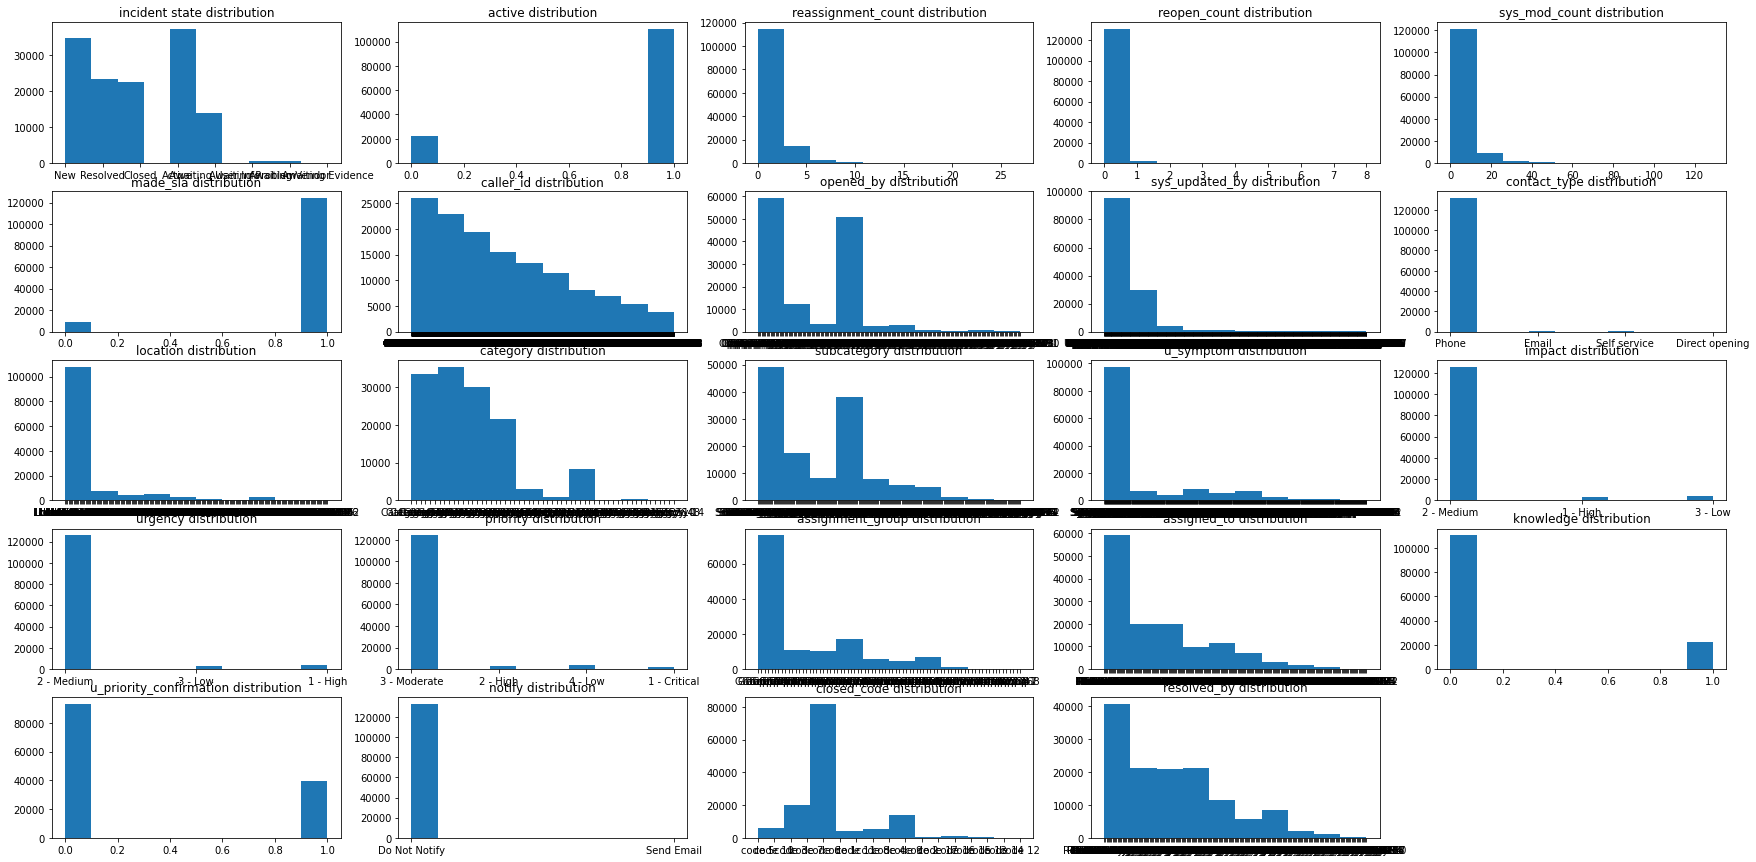

In [752]:
plt.figure(figsize=(30,15))
plt.subplot(5, 5, 1)
plt.hist(x='incident_state',data=incident_data)
plt.title(label='incident state distribution')

plt.subplot(5, 5, 2)
plt.hist(x='active',data=incident_data)
plt.title(label='active distribution')

plt.subplot(5, 5, 3)
plt.hist(x='reassignment_count',data=incident_data)
plt.title(label='reassignment_count distribution')

plt.subplot(5, 5, 4)
plt.hist(x='reopen_count',data=incident_data)
plt.title(label='reopen_count distribution')

plt.subplot(5, 5, 5)
plt.hist(x='sys_mod_count',data=incident_data)
plt.title(label='sys_mod_count distribution')

plt.subplot(5, 5, 6)
plt.hist(x='made_sla',data=incident_data)
plt.title(label='made_sla distribution')

plt.subplot(5, 5, 7)
plt.hist(x='caller_id',data=incident_data)
plt.title(label='caller_id distribution')

plt.subplot(5, 5, 8)
plt.hist(x='opened_by',data=incident_data)
plt.title(label='opened_by distribution')

plt.subplot(5, 5, 9)
plt.hist(x='sys_updated_by',data=incident_data)
plt.title(label='sys_updated_by distribution')

plt.subplot(5, 5, 10)
plt.hist(x='contact_type',data=incident_data)
plt.title(label='contact_type distribution')

plt.subplot(5, 5, 11)
plt.hist(x='location',data=incident_data)
plt.title(label='location distribution')

plt.subplot(5, 5, 12)
plt.hist(x='category',data=incident_data)
plt.title(label='category distribution')

plt.subplot(5, 5, 13)
plt.hist(x='subcategory',data=incident_data)
plt.title(label='subcategory distribution')

plt.subplot(5, 5, 14)
plt.hist(x='u_symptom',data=incident_data)
plt.title(label='u_symptom distribution')

plt.subplot(5, 5, 15)
plt.hist(x='impact',data=incident_data)
plt.title(label='impact distribution')

plt.subplot(5, 5, 16)
plt.hist(x='urgency',data=incident_data)
plt.title(label='urgency distribution')

plt.subplot(5, 5, 17)
plt.hist(x='priority',data=incident_data)
plt.title(label='priority distribution')

plt.subplot(5, 5, 18)
plt.hist(x='assignment_group',data=incident_data)
plt.title(label='assignment_group distribution')

plt.subplot(5, 5, 19)
plt.hist(x='assigned_to',data=incident_data)
plt.title(label='assigned_to distribution')

plt.subplot(5, 5, 20)
plt.hist(x='knowledge',data=incident_data)
plt.title(label='knowledge distribution')

plt.subplot(5, 5, 21)
plt.hist(x='u_priority_confirmation',data=incident_data)
plt.title(label='u_priority_confirmation distribution')

plt.subplot(5, 5, 22)
plt.hist(x='notify',data=incident_data)
plt.title(label='notify distribution')

plt.subplot(5, 5, 23)
plt.hist(x='closed_code',data=incident_data)
plt.title(label='closed_code distribution')

plt.subplot(5, 5, 24)
plt.hist(x='resolved_by',data=incident_data)
plt.title(label='resolved_by distribution')

plt.show()

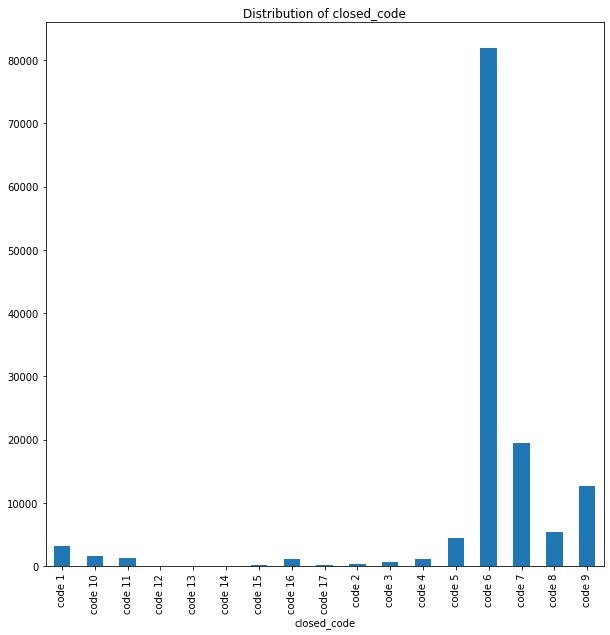

code 6     81878
code 7     19435
code 9     12578
code 8      5400
code 5      4383
code 1      3118
code 10     1520
code 11     1324
code 4      1104
code 16     1053
code 3       571
code 2       344
code 15      138
code 17      115
code 13       50
code 12       13
code 14       12
Name: closed_code, dtype: int64

In [753]:
incident_data.groupby('closed_code').count()['number'].plot(kind='bar',title='Distribution of closed_code',figsize=(10, 10))
plt.show()
incident_data['closed_code'].value_counts()

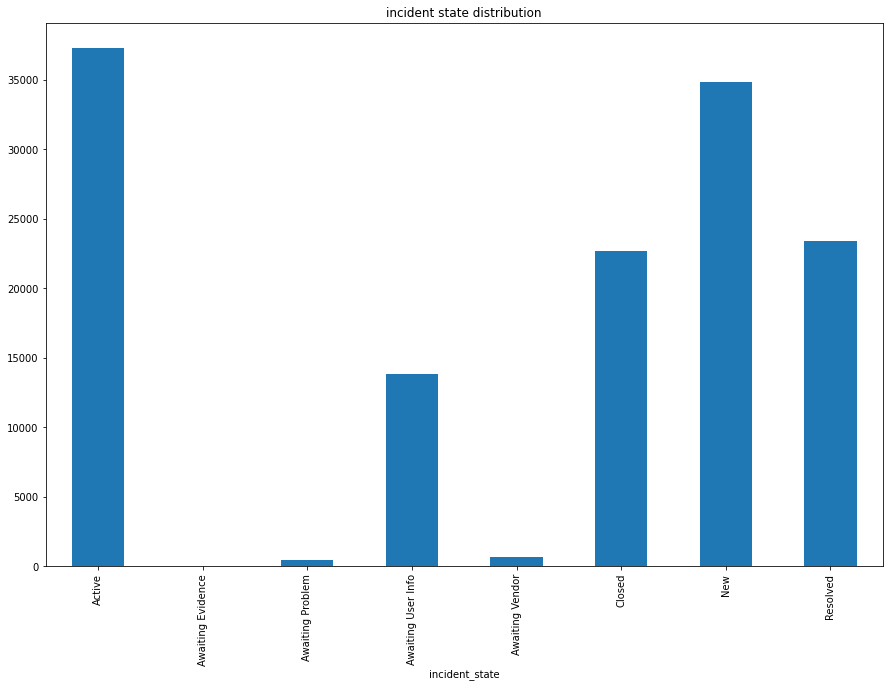

In [754]:
incident_data.groupby('incident_state').count()['number'].plot(kind='bar',title='incident state distribution',figsize=(15,10))
plt.show()

## Data Visualization

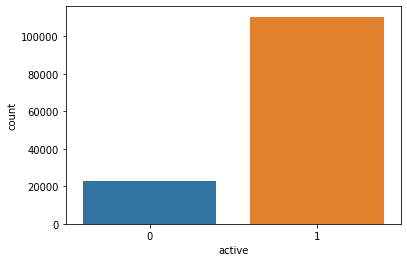

In [755]:
sns.countplot(x='active',data=incident_data)
plt.show()

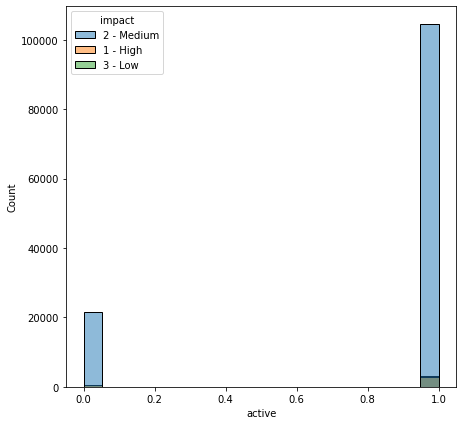

In [756]:
plt.figure(figsize=(7,7))
sns.histplot(incident_data,x='active',hue='impact')
plt.show()

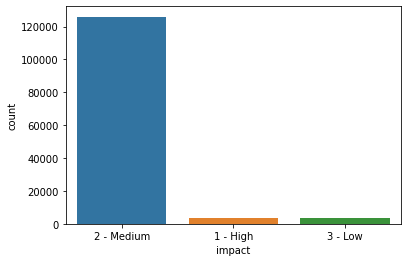

2 - Medium    126002
3 - Low         3673
1 - High        3361
Name: impact, dtype: int64

In [757]:
sns.countplot(x='impact',data=incident_data)
plt.show()
incident_data['impact'].value_counts()

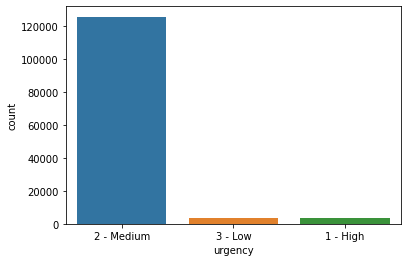

2 - Medium    125921
1 - High        3757
3 - Low         3358
Name: urgency, dtype: int64

In [758]:
sns.countplot(x='urgency',data=incident_data)
plt.show()
incident_data['urgency'].value_counts()

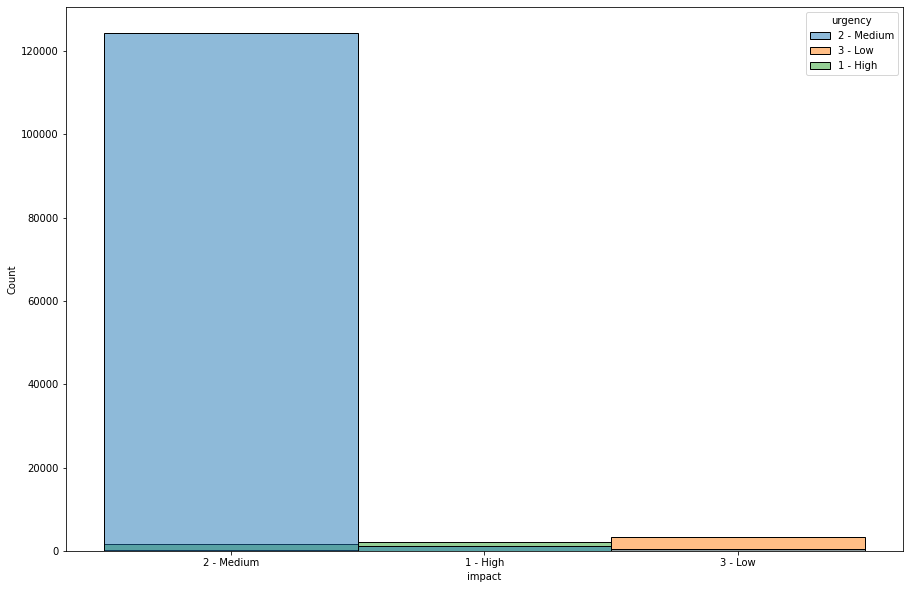

In [759]:
plt.figure(figsize=(15,10))
sns.histplot(incident_data,x='impact',hue='urgency')
plt.show()

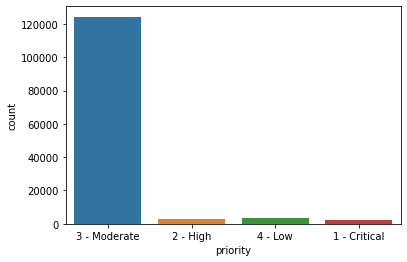

3 - Moderate    124329
4 - Low           3759
2 - High          2801
1 - Critical      2147
Name: priority, dtype: int64

In [760]:
sns.countplot(x='priority',data=incident_data)
plt.show()
incident_data['priority'].value_counts()

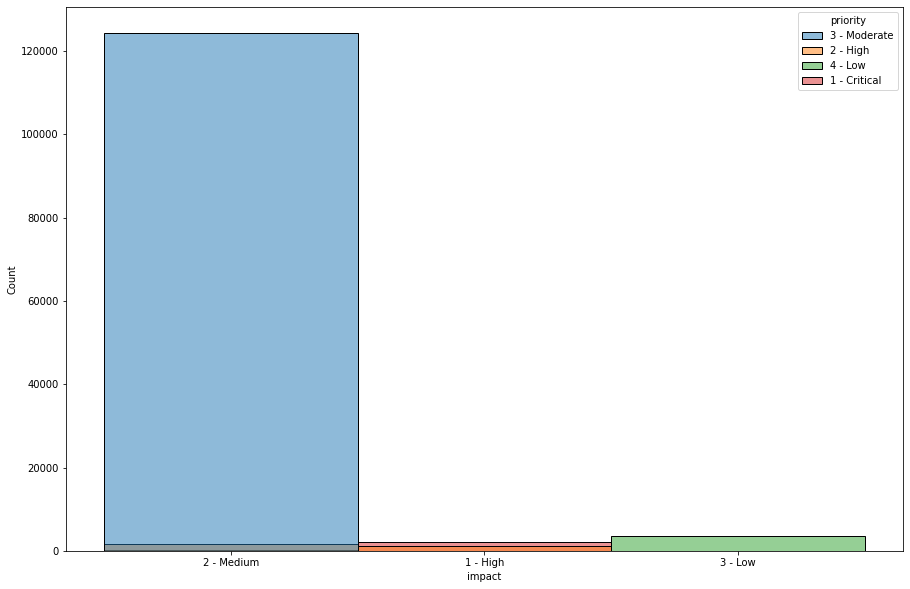

In [761]:
plt.figure(figsize=(15,10))
sns.histplot(incident_data,x='impact',hue='priority')
plt.show()

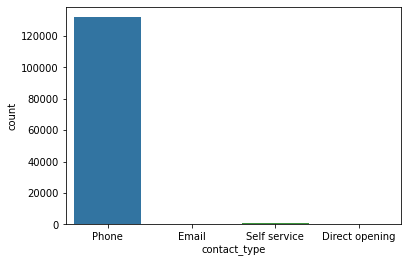

Phone             131847
Self service         981
Email                191
Direct opening        17
Name: contact_type, dtype: int64

In [762]:
sns.countplot(x='contact_type',data=incident_data)
plt.show()
incident_data['contact_type'].value_counts()

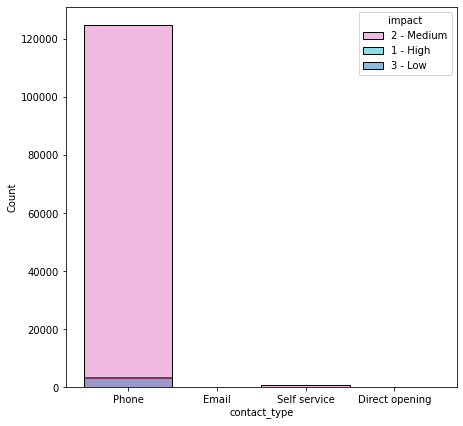

In [763]:
plt.figure(figsize=(7,7))
sns.histplot(incident_data,x='contact_type',hue='impact',palette=["C6", "C9", "C0"])
plt.show()

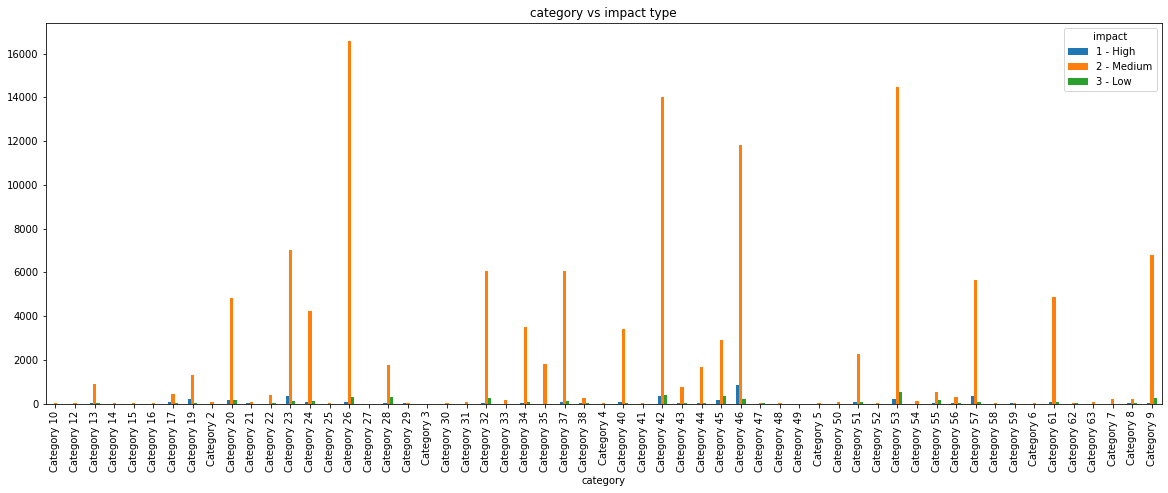

In [764]:
incident_data.category
pd.crosstab(incident_data.category,incident_data.impact).plot(kind="bar",title='category vs impact type',figsize=(20,7))
plt.show()


In [765]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

incident_data['number'] = labelencoder.fit_transform(incident_data['number'])
incident_data['incident_state'] = labelencoder.fit_transform(incident_data['incident_state'])

incident_data['caller_id'] = labelencoder.fit_transform(incident_data['caller_id'])
incident_data['opened_by'] = labelencoder.fit_transform(incident_data['opened_by'])
incident_data['sys_updated_by'] = labelencoder.fit_transform(incident_data['sys_updated_by'])
incident_data['location'] = labelencoder.fit_transform(incident_data['location'])
incident_data['category'] = labelencoder.fit_transform(incident_data['category'])
incident_data['subcategory'] = labelencoder.fit_transform(incident_data['subcategory'])
incident_data['u_symptom'] = labelencoder.fit_transform(incident_data['u_symptom'])

incident_data['contact_type'] = labelencoder.fit_transform(incident_data['contact_type'])
incident_data['impact'] = labelencoder.fit_transform(incident_data['impact'])
incident_data['urgency'] = labelencoder.fit_transform(incident_data['urgency'])
incident_data['priority'] = labelencoder.fit_transform(incident_data['priority'])
incident_data['assignment_group'] = labelencoder.fit_transform(incident_data['assignment_group'])
incident_data['assigned_to'] = labelencoder.fit_transform(incident_data['assigned_to'])

incident_data['notify'] = labelencoder.fit_transform(incident_data['notify'])
incident_data['closed_code'] = labelencoder.fit_transform(incident_data['closed_code'])
incident_data['resolved_by'] = labelencoder.fit_transform(incident_data['resolved_by'])
incident_data.head(10)

                   

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,0,6,1,0,0,0,1,1398,198,29/2/2016 01:16,101,29/2/2016 01:23,2,41,45,69,494,1,1,2,46,72,1,0,0,12,50,29/2/2016 11:29,5/3/2016 12:00
1,0,7,1,0,0,2,1,1398,198,29/2/2016 01:16,491,29/2/2016 08:53,2,41,45,69,494,1,1,2,46,72,1,0,0,12,50,29/2/2016 11:29,5/3/2016 12:00
2,0,7,1,0,0,3,1,1398,198,29/2/2016 01:16,635,29/2/2016 11:29,2,41,45,69,494,1,1,2,46,72,1,0,0,12,50,29/2/2016 11:29,5/3/2016 12:00
3,0,5,0,0,0,4,1,1398,198,29/2/2016 01:16,737,5/3/2016 12:00,2,41,45,69,494,1,1,2,46,72,1,0,0,12,50,29/2/2016 11:29,5/3/2016 12:00
4,1,6,1,0,0,0,1,1398,119,29/2/2016 04:40,583,29/2/2016 04:57,2,60,29,112,347,1,1,2,62,222,1,0,0,12,194,1/3/2016 09:52,6/3/2016 10:00
5,1,0,1,1,0,1,1,1398,119,29/2/2016 04:40,101,29/2/2016 05:30,2,60,29,112,347,1,1,2,15,166,1,0,0,12,194,1/3/2016 09:52,6/3/2016 10:00
6,1,0,1,1,0,2,1,1398,119,29/2/2016 04:40,101,29/2/2016 05:33,2,60,29,112,347,1,1,2,15,166,1,0,0,12,194,1/3/2016 09:52,6/3/2016 10:00
7,1,0,1,1,0,3,1,1398,119,29/2/2016 04:40,635,29/2/2016 11:31,2,60,29,112,347,1,1,2,15,166,1,0,0,12,194,1/3/2016 09:52,6/3/2016 10:00
8,1,0,1,1,0,4,1,1398,119,29/2/2016 04:40,543,29/2/2016 11:32,2,60,29,112,347,1,1,2,15,166,1,0,0,12,194,1/3/2016 09:52,6/3/2016 10:00
9,1,0,1,1,0,5,1,1398,119,29/2/2016 04:40,215,1/3/2016 09:14,2,60,29,112,347,1,1,2,15,166,1,0,0,12,194,1/3/2016 09:52,6/3/2016 10:00


In [766]:
incident_data.dtypes

number                      int64
incident_state              int64
active                      int64
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                    int64
caller_id                   int64
opened_by                   int64
opened_at                  object
sys_updated_by              int64
sys_updated_at             object
contact_type                int64
location                    int64
category                    int64
subcategory                 int64
u_symptom                   int64
impact                      int64
urgency                     int64
priority                    int64
assignment_group            int64
assigned_to                 int64
knowledge                   int64
u_priority_confirmation     int64
notify                      int64
closed_code                 int64
resolved_by                 int64
resolved_at                object
closed_at                  object
dtype: object

In [767]:
incident_data=incident_data.drop(columns=['opened_at','sys_updated_at','resolved_at','closed_at'])


In [768]:
incident_data.describe(include='all')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
count,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000
mean,10590.359579,3.989604,0.829693,1.119900,0.022009,5.145216,0.935115,2545.832256,84.985763,458.711544,2.005683,95.646103,29.641465,106.210635,324.728848,1.002345,0.997001,1.974924,43.692459,103.238695,0.170788,0.299535,0.000677,12.822725,88.895938
std,6634.796691,2.719617,0.375904,1.738322,0.207057,7.709739,0.246323,1452.983769,64.229302,255.017724,0.096377,62.943119,13.863534,62.148115,111.090268,0.229930,0.231243,0.336506,21.493821,59.281501,0.376325,0.458056,0.026001,2.913399,60.899040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4643.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1283.000000,31.000000,293.000000,2.000000,41.000000,15.000000,73.000000,360.000000,1.000000,1.000000,2.000000,19.000000,72.000000,0.000000,0.000000,0.000000,13.000000,37.000000
50%,10147.000000,5.000000,1.000000,1.000000,0.000000,3.000000,1.000000,2566.000000,60.000000,454.000000,2.000000,101.000000,31.000000,74.000000,360.000000,1.000000,1.000000,2.000000,56.000000,73.000000,0.000000,0.000000,0.000000,13.000000,79.000000
75%,16350.000000,6.000000,1.000000,1.000000,0.000000,6.000000,1.000000,3783.000000,146.000000,737.000000,2.000000,158.000000,43.000000,147.000000,360.000000,1.000000,1.000000,2.000000,62.000000,154.000000,0.000000,1.000000,0.000000,14.000000,140.000000
max,22592.000000,7.000000,1.000000,27.000000,8.000000,129.000000,1.000000,5047.000000,204.000000,816.000000,3.000000,217.000000,56.000000,250.000000,517.000000,2.000000,2.000000,3.000000,76.000000,232.000000,1.000000,1.000000,1.000000,16.000000,213.000000


In [769]:
incident_data['incident_state'].unique()

array([6, 7, 5, 0, 3, 2, 4, 1])

In [770]:
incident_data['reassignment_count'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [771]:
incident_data['reopen_count'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [772]:
incident_data['sys_mod_count'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       105, 106, 112, 113, 114, 115, 116, 117, 119, 128, 129])

In [773]:
incident_data['made_sla'].unique()

array([1, 0])

In [774]:
incident_data['opened_by'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [775]:
incident_data['contact_type'].unique()

array([2, 1, 3, 0])

In [776]:
incident_data['location'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [777]:
incident_data['impact'].unique()

array([1, 0, 2])

In [778]:
incident_data['urgency'].unique()

array([1, 2, 0])

In [779]:
incident_data['priority'].unique()

array([2, 1, 3, 0])

In [780]:
incident_data['category'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

In [781]:
incident_data['assignment_group'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76])

In [782]:
incident_data[incident_data.duplicated()]

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by


In [783]:
incident_data.describe(include='all')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
count,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000,133036.000000
mean,10590.359579,3.989604,0.829693,1.119900,0.022009,5.145216,0.935115,2545.832256,84.985763,458.711544,2.005683,95.646103,29.641465,106.210635,324.728848,1.002345,0.997001,1.974924,43.692459,103.238695,0.170788,0.299535,0.000677,12.822725,88.895938
std,6634.796691,2.719617,0.375904,1.738322,0.207057,7.709739,0.246323,1452.983769,64.229302,255.017724,0.096377,62.943119,13.863534,62.148115,111.090268,0.229930,0.231243,0.336506,21.493821,59.281501,0.376325,0.458056,0.026001,2.913399,60.899040
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4643.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1283.000000,31.000000,293.000000,2.000000,41.000000,15.000000,73.000000,360.000000,1.000000,1.000000,2.000000,19.000000,72.000000,0.000000,0.000000,0.000000,13.000000,37.000000
50%,10147.000000,5.000000,1.000000,1.000000,0.000000,3.000000,1.000000,2566.000000,60.000000,454.000000,2.000000,101.000000,31.000000,74.000000,360.000000,1.000000,1.000000,2.000000,56.000000,73.000000,0.000000,0.000000,0.000000,13.000000,79.000000
75%,16350.000000,6.000000,1.000000,1.000000,0.000000,6.000000,1.000000,3783.000000,146.000000,737.000000,2.000000,158.000000,43.000000,147.000000,360.000000,1.000000,1.000000,2.000000,62.000000,154.000000,0.000000,1.000000,0.000000,14.000000,140.000000
max,22592.000000,7.000000,1.000000,27.000000,8.000000,129.000000,1.000000,5047.000000,204.000000,816.000000,3.000000,217.000000,56.000000,250.000000,517.000000,2.000000,2.000000,3.000000,76.000000,232.000000,1.000000,1.000000,1.000000,16.000000,213.000000


In [784]:
incident_data.dtypes

number                     int64
incident_state             int64
active                     int64
reassignment_count         int64
reopen_count               int64
sys_mod_count              int64
made_sla                   int64
caller_id                  int64
opened_by                  int64
sys_updated_by             int64
contact_type               int64
location                   int64
category                   int64
subcategory                int64
u_symptom                  int64
impact                     int64
urgency                    int64
priority                   int64
assignment_group           int64
assigned_to                int64
knowledge                  int64
u_priority_confirmation    int64
notify                     int64
closed_code                int64
resolved_by                int64
dtype: object

In [785]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133036 entries, 0 to 141711
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   number                   133036 non-null  int64
 1   incident_state           133036 non-null  int64
 2   active                   133036 non-null  int64
 3   reassignment_count       133036 non-null  int64
 4   reopen_count             133036 non-null  int64
 5   sys_mod_count            133036 non-null  int64
 6   made_sla                 133036 non-null  int64
 7   caller_id                133036 non-null  int64
 8   opened_by                133036 non-null  int64
 9   sys_updated_by           133036 non-null  int64
 10  contact_type             133036 non-null  int64
 11  location                 133036 non-null  int64
 12  category                 133036 non-null  int64
 13  subcategory              133036 non-null  int64
 14  u_symptom                133036 non-

In [786]:
correlation=incident_data.corr()
correlation

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
number,1.000000,0.099574,-0.047838,-0.109197,-0.002589,-0.081780,0.089696,-0.008982,-0.178333,0.047290,0.125139,-0.042582,0.011180,-0.039102,0.026802,-0.063074,-0.063065,-0.059214,0.028282,-0.022354,-0.608796,0.238477,-0.027671,0.111819,-0.039136
incident_state,0.099574,1.000000,-0.168338,-0.150525,-0.076121,-0.059474,-0.096013,-0.004544,-0.030141,0.076247,0.000684,0.019035,-0.012227,-0.023599,0.010850,-0.010455,-0.005010,-0.008934,0.065862,-0.047790,-0.064505,0.427326,0.015407,0.013668,-0.046893
active,-0.047838,-0.168338,1.000000,0.033309,0.017640,-0.109253,0.576537,0.005351,0.010805,-0.483964,0.007418,0.001965,-0.001234,0.004702,-0.013227,-0.016251,-0.014264,-0.019203,-0.026765,-0.000889,0.038288,-0.519082,-0.015898,-0.013553,0.010729
reassignment_count,-0.109197,-0.150525,0.033309,1.000000,0.164335,0.523021,-0.090268,0.001231,0.010379,-0.065859,-0.006310,0.015392,-0.051564,0.041672,-0.007914,-0.019510,-0.016646,-0.022642,-0.061646,-0.035745,0.074123,-0.009666,-0.001961,-0.020720,-0.004559
reopen_count,-0.002589,-0.076121,0.017640,0.164335,1.000000,0.247886,-0.016362,-0.005364,-0.004684,-0.010931,-0.005137,-0.022929,0.009437,0.003853,-0.005948,-0.003926,0.004832,0.005548,-0.010849,-0.009393,-0.000103,0.130133,-0.002766,-0.018566,-0.006918
sys_mod_count,-0.081780,-0.059474,-0.109253,0.523021,0.247886,1.000000,-0.244990,0.010811,0.003534,0.014271,0.016370,-0.007330,-0.005716,-0.005665,-0.025254,-0.012082,-0.012270,-0.019237,-0.093011,0.039138,0.059851,0.177795,-0.001952,-0.020442,0.048078
made_sla,0.089696,-0.096013,0.576537,-0.090268,-0.016362,-0.244990,1.000000,-0.000240,-0.032159,-0.278729,0.005716,-0.012028,-0.019209,-0.005196,0.009346,0.041972,0.047654,0.051014,0.046828,-0.001602,-0.071501,-0.234266,-0.031877,0.022193,-0.006485
caller_id,-0.008982,-0.004544,0.005351,0.001231,-0.005364,0.010811,-0.000240,1.000000,0.054966,0.008072,0.009723,0.036404,-0.014396,0.008988,-0.005444,-0.005337,-0.014511,-0.012441,-0.013419,-0.029114,0.006108,-0.010297,0.001068,0.005289,-0.023842
opened_by,-0.178333,-0.030141,0.010805,0.010379,-0.004684,0.003534,-0.032159,0.054966,1.000000,-0.001372,0.017160,0.007137,-0.017512,0.013657,-0.017280,-0.085407,-0.083503,-0.075619,-0.009784,0.038939,0.194374,-0.053633,0.001163,-0.020682,0.048956
sys_updated_by,0.047290,0.076247,-0.483964,-0.065859,-0.010931,0.014271,-0.278729,0.008072,-0.001372,1.000000,-0.014498,0.005788,0.003008,0.038176,0.009922,0.010545,0.004204,0.011888,0.032209,-0.130356,-0.034840,0.217933,0.018587,0.017955,-0.131946


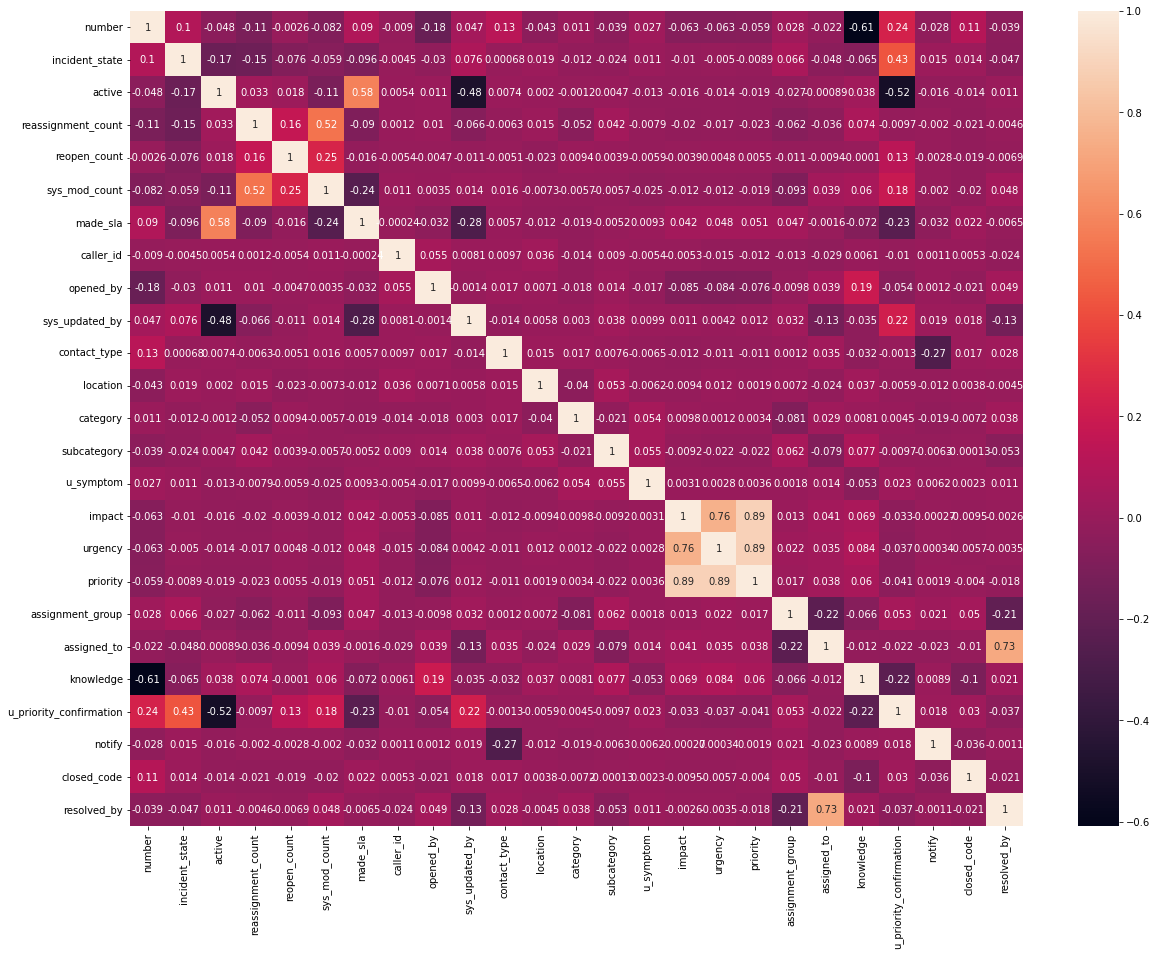

In [787]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True)
plt.show()

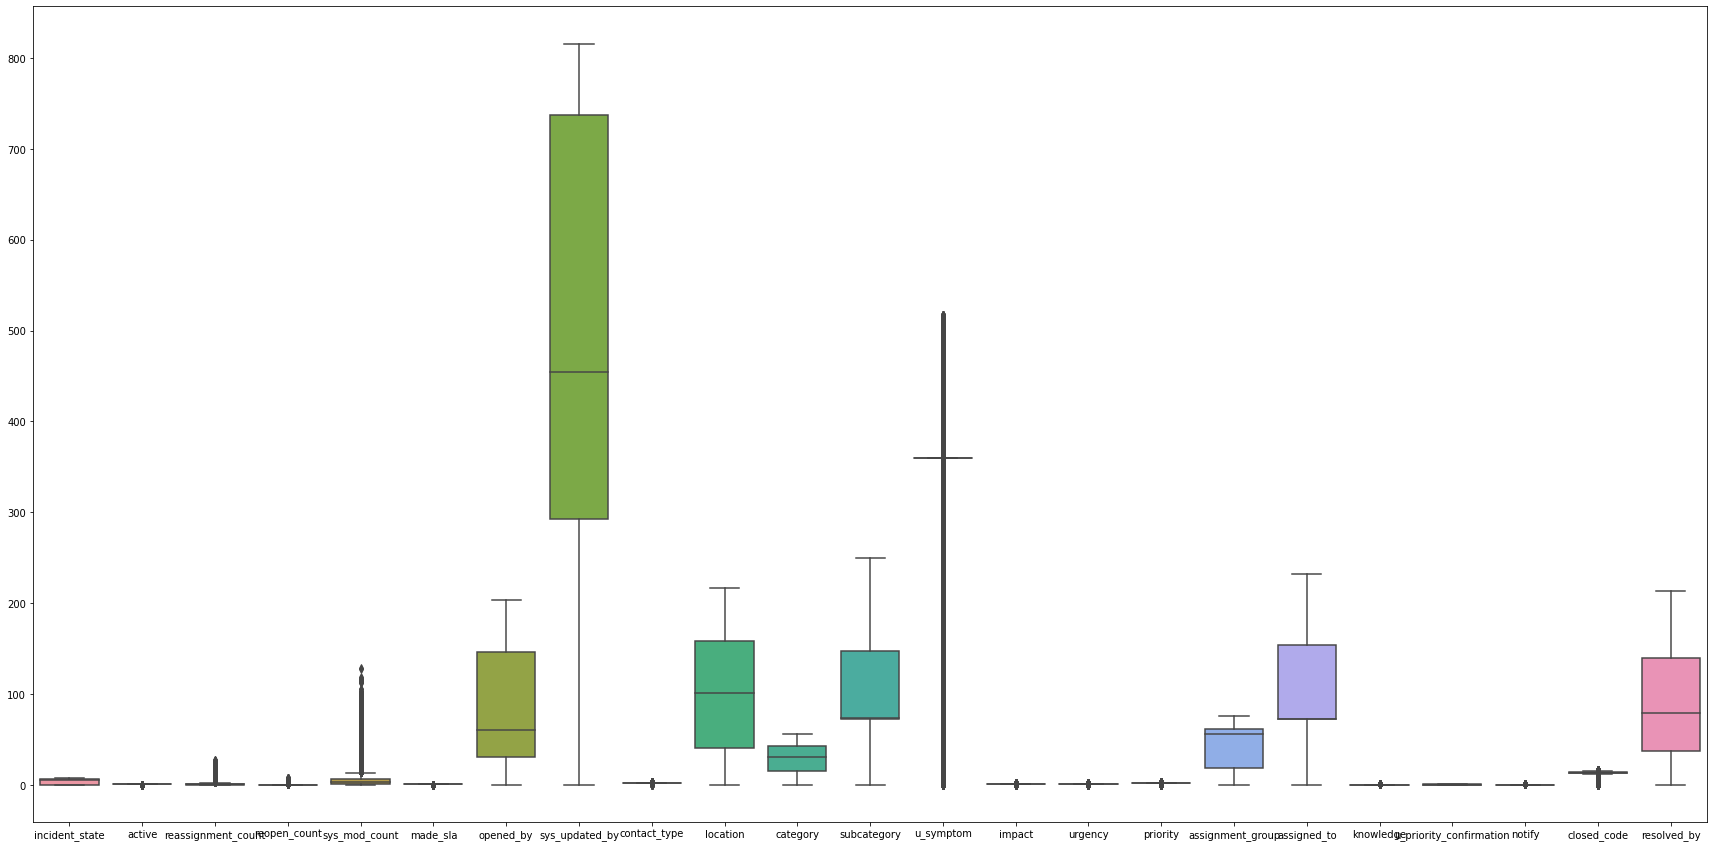

In [788]:
plt.figure(figsize=(30,15))
data=incident_data.iloc[:,1:]
data=data.drop(columns=['caller_id'])
sns.boxplot(data=data)
plt.show()

## Data Preparation

In [789]:
incident_data.reset_index(inplace=True)

In [790]:
y=incident_data['impact']
y

0         1
1         1
2         1
3         1
4         1
         ..
133031    1
133032    1
133033    1
133034    1
133035    1
Name: impact, Length: 133036, dtype: int64

In [791]:
X=incident_data.drop(columns='impact')
X

,index,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
0,0,0,6,1,0,0,0,1,1398,198,101,2,41,45,69,494,1,2,46,72,1,0,0,12,50
1,1,0,7,1,0,0,2,1,1398,198,491,2,41,45,69,494,1,2,46,72,1,0,0,12,50
2,2,0,7,1,0,0,3,1,1398,198,635,2,41,45,69,494,1,2,46,72,1,0,0,12,50
3,3,0,5,0,0,0,4,1,1398,198,737,2,41,45,69,494,1,2,46,72,1,0,0,12,50
4,4,1,6,1,0,0,0,1,1398,119,583,2,60,29,112,347,1,2,62,222,1,0,0,12,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133031,141707,22591,5,0,1,0,4,1,158,9,155,1,101,31,119,363,1,2,23,0,0,1,0,16,203
133032,141708,22592,0,1,0,0,0,1,158,9,737,1,101,31,119,363,1,2,62,0,0,0,0,13,203
133033,141709,22592,0,1,1,0,1,1,158,9,454,1,101,31,119,363,1,2,23,72,0,0,0,13,203
133034,141710,22592,7,1,1,0,2,1,158,9,155,1,101,31,119,363,1,2,23,0,0,1,0,13,203


In [792]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((106428, 25), (26608, 25), (106428,), (26608,))

## Feature Selection

### Feature selection using Chi-Square used only for the Categorical data


In [793]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [794]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=24)
ordered_feature=ordered_rank_feature.fit(X_train,y_train)
ordered_feature

SelectKBest(k=24, score_func=<function chi2 at 0x7fec10db0f80>)

In [795]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')

,scores,0
0,1.544157e+07,index
1,2.387544e+06,number
9,4.046901e+04,opened_by
24,1.052681e+04,resolved_by
19,6.480809e+03,assigned_to
10,6.162191e+03,sys_updated_by
17,5.093378e+03,priority
16,3.425197e+03,urgency
8,2.334941e+03,caller_id
14,2.148252e+03,subcategory


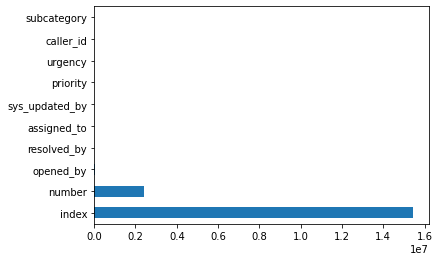

index             1.544157e+07
number            2.387544e+06
opened_by         4.046901e+04
resolved_by       1.052681e+04
assigned_to       6.480809e+03
sys_updated_by    6.162191e+03
priority          5.093378e+03
urgency           3.425197e+03
caller_id         2.334941e+03
subcategory       2.148252e+03
dtype: float64

In [796]:
ranked_features=pd.Series(ordered_feature.scores_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

# Feature selection using ExtraTreeClassifier

In [797]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [798]:
model.feature_importances_

array([8.23005988e-03, 8.00796652e-03, 2.10058160e-03, 4.12719511e-04,
       3.71260359e-03, 5.74747500e-04, 2.96569012e-03, 6.83116105e-04,
       6.09255750e-03, 1.22272746e-02, 2.33497277e-03, 1.48177098e-04,
       6.62042982e-03, 6.76158412e-03, 6.42152984e-03, 4.53562602e-03,
       3.36025044e-01, 5.64553941e-01, 4.66395668e-03, 5.25464680e-03,
       3.76972106e-03, 2.99519677e-03, 7.54178865e-07, 4.45039180e-03,
       6.45671032e-03])

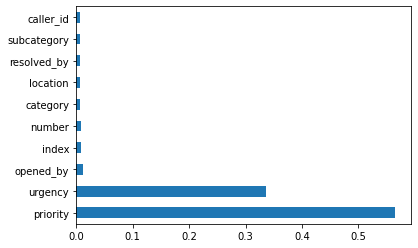

priority       0.564554
urgency        0.336025
opened_by      0.012227
index          0.008230
number         0.008008
category       0.006762
location       0.006620
resolved_by    0.006457
subcategory    0.006422
caller_id      0.006093
dtype: float64

In [799]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

# Feature selection using DecisionTreeClassifier

In [800]:
from sklearn.tree import DecisionTreeClassifier

DT_class = DecisionTreeClassifier()
DT_class.fit(X_train,y_train)

DecisionTreeClassifier()

In [801]:
DT_class.feature_importances_

array([3.18535317e-03, 3.74155836e-03, 0.00000000e+00, 0.00000000e+00,
       1.86499657e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.07432790e-05, 1.69930198e-04, 0.00000000e+00, 0.00000000e+00,
       1.24153761e-03, 0.00000000e+00, 4.81608808e-03, 3.89199212e-05,
       1.05315277e-01, 8.79444411e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.51184962e-04])

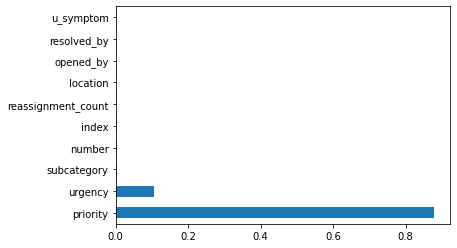

priority              0.879444
urgency               0.105315
subcategory           0.004816
number                0.003742
index                 0.003185
reassignment_count    0.001865
location              0.001242
opened_by             0.000170
resolved_by           0.000151
u_symptom             0.000039
dtype: float64

In [802]:
ranked_features=pd.Series(DT_class.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

# Feature Selection using Mutual information

In [803]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.18880253, 0.19484411, 0.00617946, 0.0164661 , 0.00230651,
       0.00095893, 0.00268511, 0.0214645 , 0.10919367, 0.07071695,
       0.03223923, 0.02320618, 0.0137051 , 0.02016542, 0.02926783,
       0.03323017, 0.17205546, 0.24721907, 0.02924633, 0.04081359,
       0.00629017, 0.00168072, 0.000977  , 0.0109254 , 0.04802267])

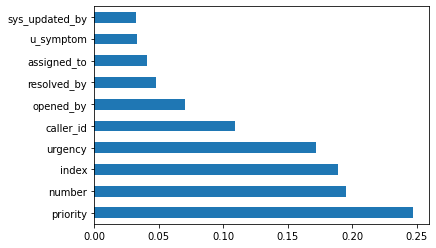

priority          0.247219
number            0.194844
index             0.188803
urgency           0.172055
caller_id         0.109194
opened_by         0.070717
resolved_by       0.048023
assigned_to       0.040814
u_symptom         0.033230
sys_updated_by    0.032239
dtype: float64

In [804]:
ranked_features=pd.Series(mutual_info,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()
ranked_features.nlargest(10)

## Selected the important Features which are obtained from the Feature Selection Process.(Select the Features having more impact on dependent variable.)

In [805]:
X=incident_data[['priority','urgency','index','number','opened_by','resolved_by','assigned_to','category','knowledge','location','u_priority_confirmation','reassignment_count']]
X

,priority,urgency,index,number,opened_by,resolved_by,assigned_to,category,knowledge,location,u_priority_confirmation,reassignment_count
0,2,1,0,0,198,50,72,45,1,41,0,0
1,2,1,1,0,198,50,72,45,1,41,0,0
2,2,1,2,0,198,50,72,45,1,41,0,0
3,2,1,3,0,198,50,72,45,1,41,0,0
4,2,1,4,1,119,194,222,29,1,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
133031,2,1,141707,22591,9,203,0,31,0,101,1,1
133032,2,1,141708,22592,9,203,0,31,0,101,0,0
133033,2,1,141709,22592,9,203,72,31,0,101,0,1
133034,2,1,141710,22592,9,203,0,31,0,101,1,1


In [806]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133036 entries, 0 to 133035
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   priority                 133036 non-null  int64
 1   urgency                  133036 non-null  int64
 2   index                    133036 non-null  int64
 3   number                   133036 non-null  int64
 4   opened_by                133036 non-null  int64
 5   resolved_by              133036 non-null  int64
 6   assigned_to              133036 non-null  int64
 7   category                 133036 non-null  int64
 8   knowledge                133036 non-null  int64
 9   location                 133036 non-null  int64
 10  u_priority_confirmation  133036 non-null  int64
 11  reassignment_count       133036 non-null  int64
dtypes: int64(12)
memory usage: 12.2 MB


In [807]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106428, 12), (26608, 12), (106428,), (26608,))

## Logistic regression Algorithm

## Model Building

In [808]:
from sklearn.linear_model import LogisticRegression

In [809]:
logistic_model=LogisticRegression()

In [810]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

## Model Testing

In [811]:
# for train data
y_pred = logistic_model.predict(X_train)

# for test data
y_pred_test = logistic_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [812]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train,y_pred)
mat_train

array([[     0,   2659,      0],
       [     0, 100796,      3],
       [     0,   2970,      0]])

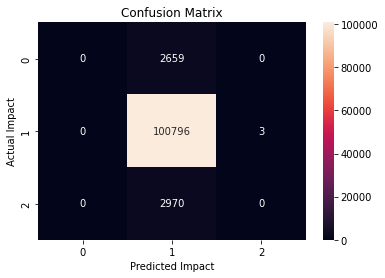

In [813]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [814]:
# for test data
mat_test=confusion_matrix(y_test,y_pred_test)
mat_test

array([[    0,   702,     0],
       [    0, 25202,     1],
       [    0,   703,     0]])

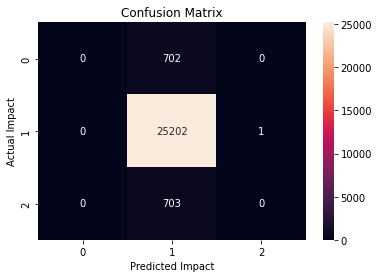

In [815]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

## The model accuracy 

In [816]:
# for train data
print(accuracy_score(y_train,y_pred))

0.9470815950689668


In [817]:
# for test data
print(accuracy_score(y_test,y_pred_test))

0.9471587492483463


In [818]:
# for train data
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2659
           1       0.95      1.00      0.97    100799
           2       0.00      0.00      0.00      2970

    accuracy                           0.95    106428
   macro avg       0.32      0.33      0.32    106428
weighted avg       0.90      0.95      0.92    106428



In [819]:
# for test data
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       702
           1       0.95      1.00      0.97     25203
           2       0.00      0.00      0.00       703

    accuracy                           0.95     26608
   macro avg       0.32      0.33      0.32     26608
weighted avg       0.90      0.95      0.92     26608



## Balancing The Data

In [876]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_SMOTE,y_train_SMOTE=sm.fit_resample(X_train,y_train)
X_test_SMOTE,y_test_SMOTE=sm.fit_resample(X_test,y_test)

In [874]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_SMOTE))

Before SMOTE : Counter({1: 100799, 2: 2970, 0: 2659})
After SMOTE : Counter({1: 100799, 2: 100799, 0: 100799})


In [822]:
y_train.shape

(106428,)

In [823]:
y_train_SMOTE.shape

(302397,)

## Logistic regression Algorithm with Balanced Data

## Model Building

In [824]:
from sklearn.linear_model import LogisticRegression

In [825]:
logistic_model_1=LogisticRegression()

In [826]:
logistic_model_1.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

## Model Testing

In [827]:
# for train data
y_pred_1 = logistic_model_1.predict(X_train_SMOTE)

# for test data
y_pred_test_1 = logistic_model_1.predict(X_test_SMOTE)


In [828]:
y_train_SMOTE.shape

(302397,)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [829]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train_SMOTE,y_pred_1)
mat_train

array([[48687, 34753, 17359],
       [31870, 42678, 26251],
       [19710, 25265, 55824]])

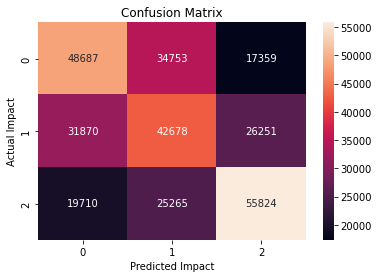

In [830]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [831]:
# for test data
mat_test=confusion_matrix(y_test_SMOTE,y_pred_test_1)
mat_test

array([[12827,  7905,  4471],
       [ 8019, 10547,  6637],
       [ 5148,  6534, 13521]])

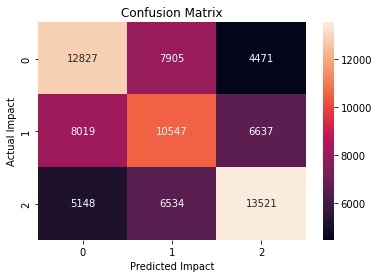

In [832]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

## The model accuracy 

In [833]:
# for train data
print(accuracy_score(y_train_SMOTE,y_pred_1))

0.48674093989027667


In [834]:
# for test data
print(accuracy_score(y_test_SMOTE,y_pred_test_1))

0.4879710087423455


In [835]:
# for train data
print(classification_report(y_train_SMOTE,y_pred_1))

              precision    recall  f1-score   support

           0       0.49      0.48      0.48    100799
           1       0.42      0.42      0.42    100799
           2       0.56      0.55      0.56    100799

    accuracy                           0.49    302397
   macro avg       0.49      0.49      0.49    302397
weighted avg       0.49      0.49      0.49    302397



In [836]:
# for test data
print(classification_report(y_test_SMOTE,y_pred_test_1))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50     25203
           1       0.42      0.42      0.42     25203
           2       0.55      0.54      0.54     25203

    accuracy                           0.49     75609
   macro avg       0.49      0.49      0.49     75609
weighted avg       0.49      0.49      0.49     75609



## Decision Tree Model

In [837]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

## Finding out the best hyperparameter for building the Tree


In [838]:
from sklearn.model_selection import GridSearchCV

In [839]:
#grid_search = GridSearchCV(estimator = dt_model, param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]} , cv= 5)
#grid_search

In [840]:
#grid_search.fit(X,y)

In [841]:
#grid_search.best_params_ 

In [842]:
#grid_search.best_score_

In [843]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [844]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

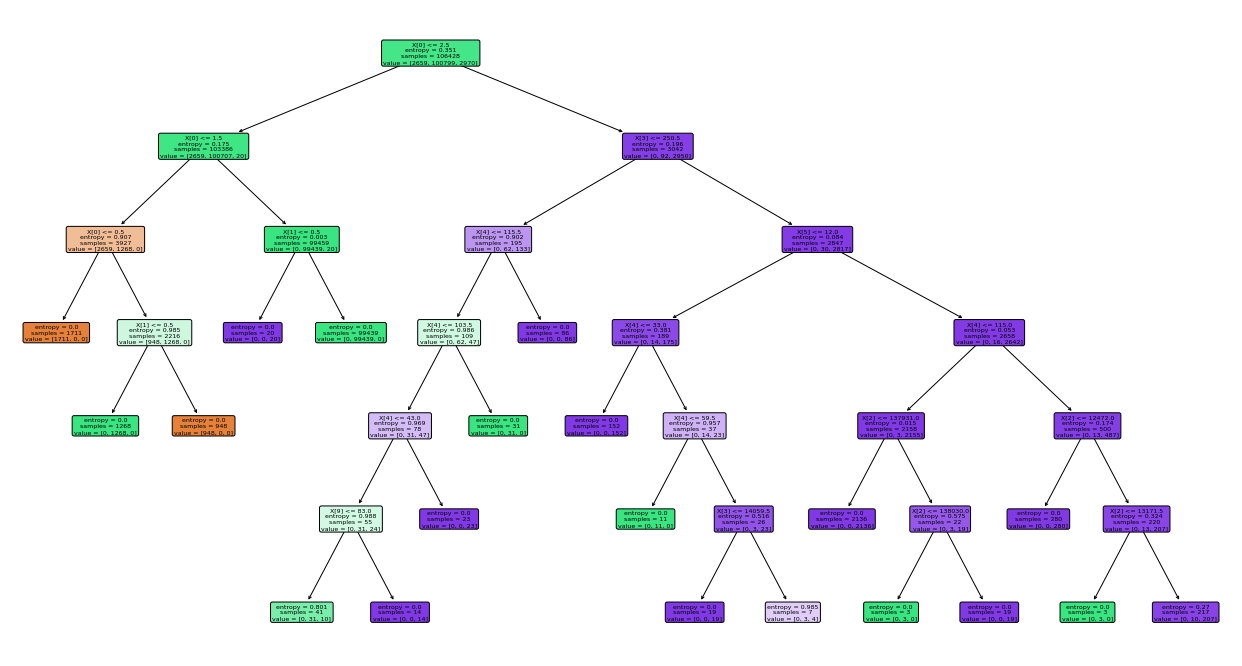

In [845]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

## Model Testing

In [846]:
# for train data
y_pred_2=dt_model.predict(X_train)

# for test data
y_pred_test_2=dt_model.predict(X_test)

## Confusion_Matrix :- To know the Misclassification done by the model

In [847]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train,y_pred_2)
mat_train

array([[  2659,      0,      0],
       [     0, 100786,     13],
       [     0,     10,   2960]])

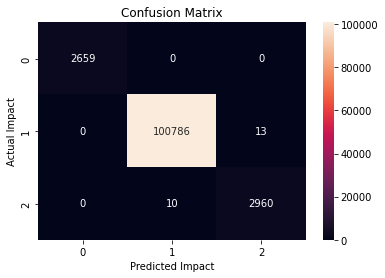

In [848]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [849]:
# for test data
mat_test=confusion_matrix(y_test,y_pred_test_2)
mat_test

array([[  702,     0,     0],
       [    0, 25200,     3],
       [    0,     4,   699]])

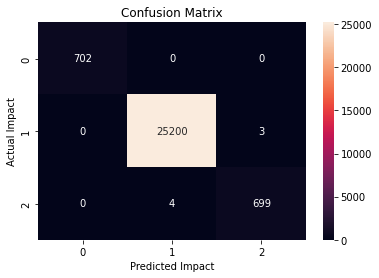

In [850]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

### The model accuracy 

In [851]:
# for train data
print(accuracy_score(y_train,y_pred_2))

0.9997838914571353


In [852]:
# for test data
print(accuracy_score(y_test,y_pred_test_2))

0.9997369212266988


In [853]:
# for train data
print(classification_report(y_train,y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2659
           1       1.00      1.00      1.00    100799
           2       1.00      1.00      1.00      2970

    accuracy                           1.00    106428
   macro avg       1.00      1.00      1.00    106428
weighted avg       1.00      1.00      1.00    106428



In [854]:
# for test data
print(classification_report(y_test,y_pred_test_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00     25203
           2       1.00      0.99      1.00       703

    accuracy                           1.00     26608
   macro avg       1.00      1.00      1.00     26608
weighted avg       1.00      1.00      1.00     26608



## Decision Tree Model With balanced Data

In [855]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

## Finding out the best hyperparameter for building the Tree


In [856]:
from sklearn.model_selection import GridSearchCV

In [857]:
#grid_search = GridSearchCV(estimator = dt_model, param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]} , cv= 5)
#grid_search

In [858]:
#grid_search.fit(X,y)

In [859]:
#grid_search.best_params_ 

In [860]:
#grid_search.best_score_

In [861]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [862]:
dt_model.fit(X_train_SMOTE,y_train_SMOTE)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

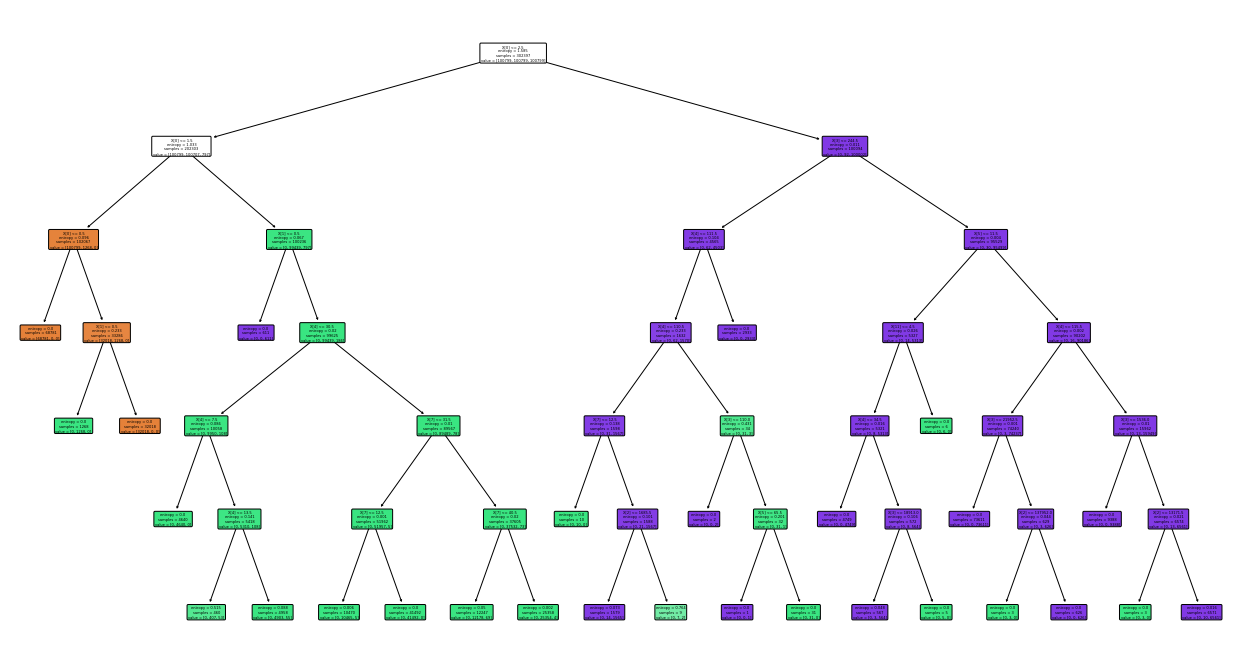

In [863]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

## Model Testing

In [868]:
# for train data
y_pred_3=dt_model.predict(X_train_SMOTE)
y_pred_3=pd.DataFrame(y_pred_3)
y_pred_3
# for test data
y_pred_test_3=dt_model.predict(X_test_SMOTE)
y_pred_test_3=pd.DataFrame(y_pred_test_3)
y_pred_test_3

,0
0,1
1,1
2,1
3,1
4,1
...,...
75604,2
75605,2
75606,2
75607,2


In [877]:

X_test_SMOTE['Prediction']=y_pred_test_3
X_test_SMOTE

,priority,urgency,index,number,opened_by,resolved_by,assigned_to,category,knowledge,location,u_priority_confirmation,reassignment_count,Prediction
0,2,1,35936,4608,31,99,120,15,0,211,0,2,1
1,2,1,113240,17345,4,161,187,12,0,57,0,1,1
2,2,1,104883,15895,52,145,72,12,0,57,0,1,1
3,2,1,36145,4630,31,11,72,12,0,204,0,0,1
4,2,1,37533,4835,119,1,13,47,0,7,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75604,3,2,11899,1462,79,74,92,36,0,83,0,0,2
75605,3,2,17943,2219,14,49,72,43,1,40,0,0,2
75606,3,2,1812,259,14,32,48,46,1,199,0,0,2
75607,3,1,74915,10480,104,66,85,22,0,53,0,0,2


## Confusion_Matrix :- To know the Misclassification done by the model

In [615]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train_SMOTE,y_pred_3)
mat_train

array([[100799,      0,      0],
       [     0, 100772,     27],
       [     0,    188, 100611]])

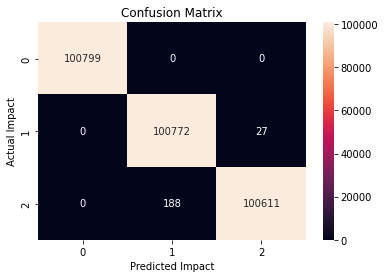

In [616]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [617]:
# for test data
mat_test=confusion_matrix(y_test_SMOTE,y_pred_test_3)
mat_test

array([[25203,     0,     0],
       [    0, 25197,     6],
       [    0,    67, 25136]])

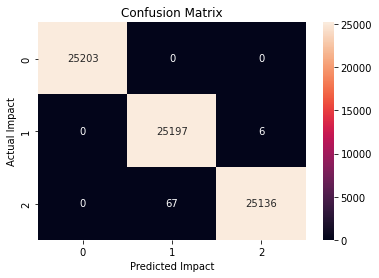

In [618]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

### The model accuracy 

In [619]:
# for train data
print(accuracy_score(y_train_SMOTE,y_pred_3))

0.9992890141105897


In [620]:
# for test data
print(accuracy_score(y_test_SMOTE,y_pred_test_3))

0.999034506474097


In [621]:
# for train data
print(classification_report(y_train_SMOTE,y_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100799
           1       1.00      1.00      1.00    100799
           2       1.00      1.00      1.00    100799

    accuracy                           1.00    302397
   macro avg       1.00      1.00      1.00    302397
weighted avg       1.00      1.00      1.00    302397



In [622]:
# for test data
print(classification_report(y_test_SMOTE,y_pred_test_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25203
           1       1.00      1.00      1.00     25203
           2       1.00      1.00      1.00     25203

    accuracy                           1.00     75609
   macro avg       1.00      1.00      1.00     75609
weighted avg       1.00      1.00      1.00     75609



## Random Forest Algorithm

In [623]:
from sklearn.ensemble import RandomForestClassifier

In [624]:
rf_model=RandomForestClassifier()

In [625]:
#grid_search=GridSearchCV(rf_model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]},cv=5)
#grid_search

In [626]:
#grid_search.fit(X,y)

In [627]:
#grid_search.best_params_

In [628]:
#grid_search.best_score_

## Model Training

In [629]:
rf_model=RandomForestClassifier(criterion='entropy',max_depth=3)

In [630]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

## Model Testing

In [631]:
y_pred_4= rf_model.predict(X_train)

In [632]:
y_pred_test_4= rf_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [633]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train,y_pred_4)
mat_train

array([[    86,   2573,      0],
       [     0, 100707,     92],
       [     0,    197,   2773]])

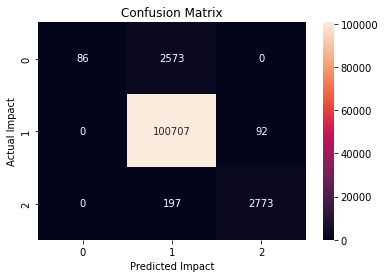

In [634]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [635]:
# for test data
mat_test=confusion_matrix(y_test,y_pred_test_4)
mat_test

array([[   23,   679,     0],
       [    0, 25186,    17],
       [    0,    59,   644]])

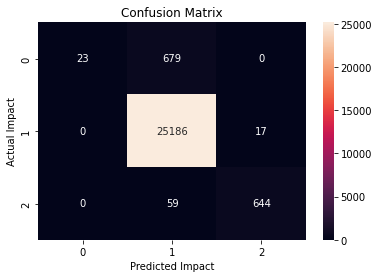

In [636]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

## The model accuracy 

In [637]:
# for train data
print(accuracy_score(y_train,y_pred_4))

0.973108580448754


In [638]:
# for test data
print(accuracy_score(y_test,y_pred_test_4))

0.9716250751653638


In [639]:
# for train data
print(classification_report(y_train,y_pred_4))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06      2659
           1       0.97      1.00      0.99    100799
           2       0.97      0.93      0.95      2970

    accuracy                           0.97    106428
   macro avg       0.98      0.66      0.67    106428
weighted avg       0.97      0.97      0.96    106428



In [640]:
# for test data
print(classification_report(y_test,y_pred_test_4))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       702
           1       0.97      1.00      0.99     25203
           2       0.97      0.92      0.94       703

    accuracy                           0.97     26608
   macro avg       0.98      0.65      0.66     26608
weighted avg       0.97      0.97      0.96     26608



## Balancing The Data

In [641]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_SMOTE,y_train_SMOTE=sm.fit_resample(X_train,y_train)
X_test_SMOTE,y_test_SMOTE=sm.fit_resample(X_test,y_test)

In [642]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_SMOTE))

Before SMOTE : Counter({1: 100799, 2: 2970, 0: 2659})
After SMOTE : Counter({1: 100799, 2: 100799, 0: 100799})


In [643]:
y_train.shape

(106428,)

In [644]:
y_train_SMOTE.shape

(302397,)

## Random Forest Algorithm with balanced data

In [645]:
from sklearn.ensemble import RandomForestClassifier

In [646]:
rf_model=RandomForestClassifier()

In [647]:
#grid_search=GridSearchCV(rf_model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]},cv=5)
#grid_search

In [648]:
#grid_search.fit(X,y)

In [649]:
#grid_search.best_params_

In [650]:
#grid_search.best_score_

## Model Training

In [651]:
rf_model=RandomForestClassifier(criterion='gini',max_depth=3)

In [652]:
rf_model.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=3)

## Model Testing

In [653]:
y_pred_5= rf_model.predict(X_train_SMOTE)

In [654]:
y_pred_test_5= rf_model.predict(X_test_SMOTE)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [655]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train_SMOTE,y_pred_5)
mat_train

array([[100799,      0,      0],
       [  1268,  99439,     92],
       [     0,   1877,  98922]])

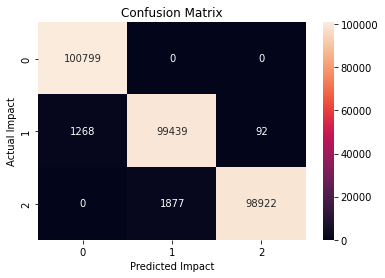

In [656]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [657]:
# for test data
mat_test=confusion_matrix(y_test_SMOTE,y_pred_test_5)
mat_test

array([[25203,     0,     0],
       [  319, 24867,    17],
       [    0,   522, 24681]])

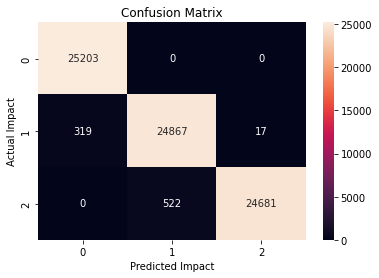

In [658]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

## The model accuracy 

In [659]:
# for train data
print(accuracy_score(y_train_SMOTE,y_pred_5))

0.9892955287254834


In [660]:
# for test data
print(accuracy_score(y_test_SMOTE,y_pred_test_5))

0.988652144585962


In [661]:
# for train data
print(classification_report(y_train_SMOTE,y_pred_5))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    100799
           1       0.98      0.99      0.98    100799
           2       1.00      0.98      0.99    100799

    accuracy                           0.99    302397
   macro avg       0.99      0.99      0.99    302397
weighted avg       0.99      0.99      0.99    302397



In [662]:
# for test data
print(classification_report(y_test_SMOTE,y_pred_test_5))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25203
           1       0.98      0.99      0.98     25203
           2       1.00      0.98      0.99     25203

    accuracy                           0.99     75609
   macro avg       0.99      0.99      0.99     75609
weighted avg       0.99      0.99      0.99     75609



## Knn Algorithm

In [663]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [664]:
st_scaler=StandardScaler()

In [665]:
scale_data=st_scaler.fit_transform(X)
X=pd.DataFrame(scale_data,columns=['priority','urgency','index','number','opened_by','resolved_by','assigned_to','category','knowledge','location','u_priority_confirmation','reassignment_count'])
X.head(4)

,priority,urgency,index,number,opened_by,resolved_by,assigned_to,category,knowledge,location,u_priority_confirmation,reassignment_count
0,0.074519,0.01297,-1.759995,-1.59619,1.75955,-0.638698,-0.526957,1.107841,2.203452,-0.868186,-0.65393,-0.644244
1,0.074519,0.01297,-1.759971,-1.59619,1.75955,-0.638698,-0.526957,1.107841,2.203452,-0.868186,-0.65393,-0.644244
2,0.074519,0.01297,-1.759946,-1.59619,1.75955,-0.638698,-0.526957,1.107841,2.203452,-0.868186,-0.65393,-0.644244
3,0.074519,0.01297,-1.759922,-1.59619,1.75955,-0.638698,-0.526957,1.107841,2.203452,-0.868186,-0.65393,-0.644244


In [666]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((106428, 12), (26608, 12), (106428,), (26608,))

In [667]:
Knn_model=KNeighborsClassifier()

In [668]:
from sklearn.model_selection import cross_val_score
CV_Scores = []
for i in range(1,18,1):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  cross_validation_score = cross_val_score(estimator = knn_model,X=X,y=y,cv=6)
  CV_Scores.append(cross_validation_score.mean())


In [669]:
CV_Scores

[0.9983312885823082,
 0.9982486040830846,
 0.9983012206287333,
 0.9982110208361927,
 0.998398938765729,
 0.9983237712548991,
 0.9984440379839684,
 0.9983237715939146,
 0.998474104581482,
 0.9984214880358334,
 0.9983914200822582,
 0.9983763867835016,
 0.998489137202208,
 0.9984665872540729,
 0.9984741032254204,
 0.9983312868872313,
 0.9983538368353665]

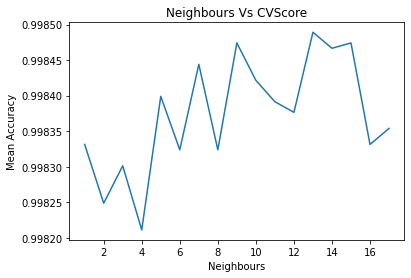

In [671]:
sns.lineplot(range(1,18,1),CV_Scores)
plt.title('Neighbours Vs CVScore')
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()


In [672]:
CV_Scores.index(max(CV_Scores))

12

**Index 1 corresponds to the 13 Neighbours so it is the Optimal Number for this data.**

## Model Preparation

In [673]:
knn_model = KNeighborsClassifier(n_neighbors=13)

## Model Training

In [674]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [675]:
y_pred_6 =knn_model.predict(X_train)

In [676]:
y_pred_test_6 =knn_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [677]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train,y_pred_6)
mat_train

array([[  2659,      0,      0],
       [     1, 100738,     60],
       [     0,     27,   2943]])

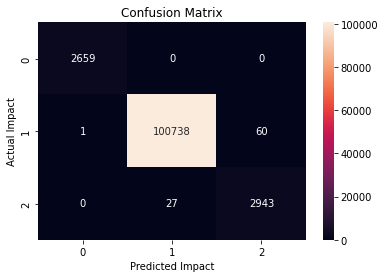

In [678]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [679]:
# for test data
mat_test=confusion_matrix(y_test,y_pred_test_6)
mat_test

array([[  702,     0,     0],
       [    1, 25190,    12],
       [    0,     5,   698]])

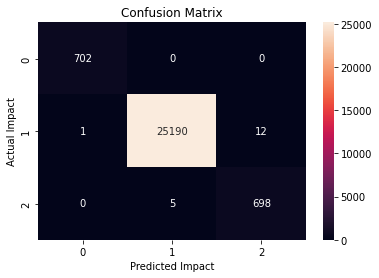

In [680]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

## The model accuracy 

In [681]:
# for train data
print(accuracy_score(y_train,y_pred_6))

0.9991731499229526


In [682]:
# for test data
print(accuracy_score(y_test,y_pred_test_6))

0.9993235117257967


In [683]:
# for train data
print(classification_report(y_train,y_pred_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2659
           1       1.00      1.00      1.00    100799
           2       0.98      0.99      0.99      2970

    accuracy                           1.00    106428
   macro avg       0.99      1.00      0.99    106428
weighted avg       1.00      1.00      1.00    106428



In [684]:
# for test data
print(classification_report(y_test,y_pred_test_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00     25203
           2       0.98      0.99      0.99       703

    accuracy                           1.00     26608
   macro avg       0.99      1.00      1.00     26608
weighted avg       1.00      1.00      1.00     26608



## Support Vector Machines Algorithm

In [685]:
from sklearn.svm import SVC

In [686]:
svm_model=SVC(kernel='linear')

In [687]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

## model Prediction

In [688]:
y_pred_7=svm_model.predict(X_train)

In [689]:
y_pred_test_7=svm_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [690]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# for train data
mat_train=confusion_matrix(y_train,y_pred_7)
mat_train

array([[  2659,      0,      0],
       [     0, 100707,     92],
       [     0,      0,   2970]])

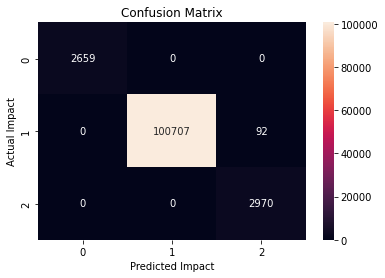

In [691]:
ax= sns.heatmap(mat_train, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

In [692]:
# for test data
mat_test=confusion_matrix(y_test,y_pred_test_7)
mat_test

array([[  702,     0,     0],
       [    0, 25186,    17],
       [    0,     0,   703]])

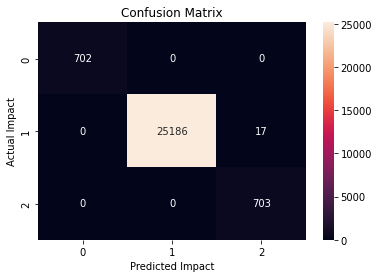

In [693]:
ax= sns.heatmap(mat_test, annot=True,fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Impact')
ax.set_ylabel('Actual Impact')
plt.show()

## The model accuracy 

In [694]:
# for train data
print(accuracy_score(y_train,y_pred_7))

0.9991355658285413


In [695]:
# for test data
print(accuracy_score(y_test,y_pred_test_7))

0.9993610944076969


In [696]:
# for train data
print(classification_report(y_train,y_pred_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2659
           1       1.00      1.00      1.00    100799
           2       0.97      1.00      0.98      2970

    accuracy                           1.00    106428
   macro avg       0.99      1.00      0.99    106428
weighted avg       1.00      1.00      1.00    106428



In [697]:
# for test data
print(classification_report(y_test,y_pred_test_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00     25203
           2       0.98      1.00      0.99       703

    accuracy                           1.00     26608
   macro avg       0.99      1.00      1.00     26608
weighted avg       1.00      1.00      1.00     26608

